<a href="https://colab.research.google.com/github/AbdulHamid13/Diabetes-Prediction-use-Classification/blob/main/DiabetesPrediction_with_4_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pandas_profiling as pp
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("../content/drive/MyDrive/Colab Notebooks/PSD/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [ ]:
print("Shape of Data is ==> ",df.shape)

Shape of Data is ==>  (768, 9)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [ ]:
for i in df.columns:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [ ]:
df.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [ ]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

In [ ]:
def std_based(col_name,df):
    mean = df[col_name].mean()
    std = df[col_name].std()
    cut_off = std * 3
    lower, upper = mean - cut_off, mean + cut_off
    new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    return new_df

In [ ]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
DPF              0
Age              0
Outcome          0
dtype: int64

In [ ]:
df['Pregnancies'].describe()

count   768.000
mean      3.845
std       3.370
min       0.000
25%       1.000
50%       3.000
75%       6.000
max      17.000
Name: Pregnancies, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


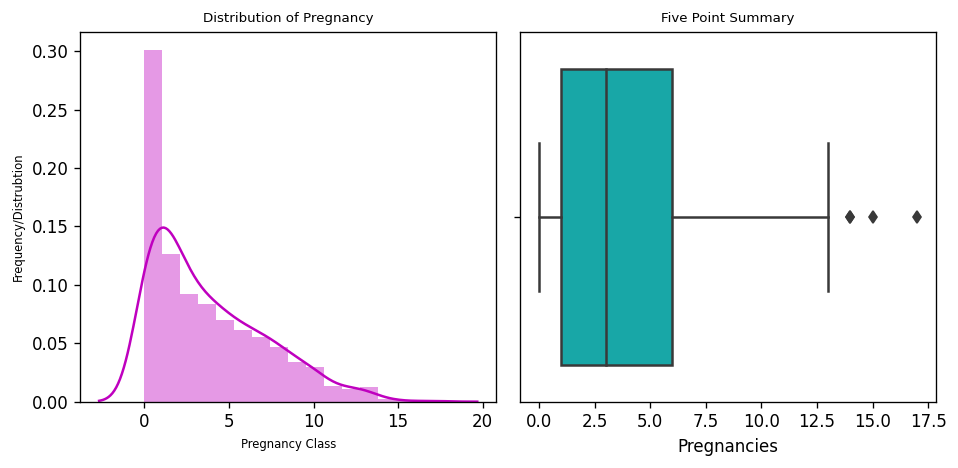

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Pregnancies'],ax=axes[0],color='m')
axes[0].set_title('Distribution of Pregnancy',fontdict={'fontsize':8})
axes[0].set_xlabel('Pregnancy Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Pregnancies',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df['Glucose'].describe()

count   768.000
mean    120.895
std      31.973
min       0.000
25%      99.000
50%     117.000
75%     140.250
max     199.000
Name: Glucose, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


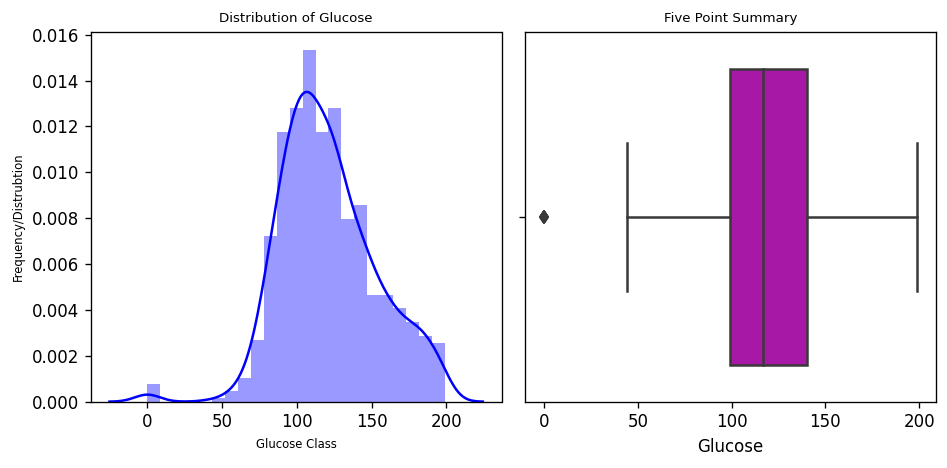

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df.Glucose = df.Glucose.replace(0,df.Glucose.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.000,72,35,0,33.600,0.627,50,1
1,1,85.000,66,29,0,26.600,0.351,31,0
2,8,183.000,64,0,0,23.300,0.672,32,1
3,1,89.000,66,23,94,28.100,0.167,21,0
4,0,137.000,40,35,168,43.100,2.288,33,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


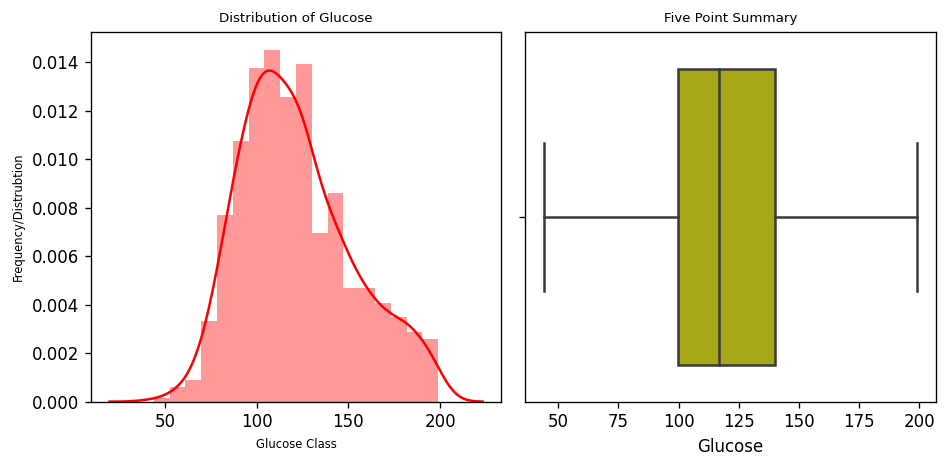

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Glucose'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Glucose',data=df,ax=axes[1],orient = 'v',color='y')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df.BloodPressure.describe()

count   768.000
mean     69.105
std      19.356
min       0.000
25%      62.000
50%      72.000
75%      80.000
max     122.000
Name: BloodPressure, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


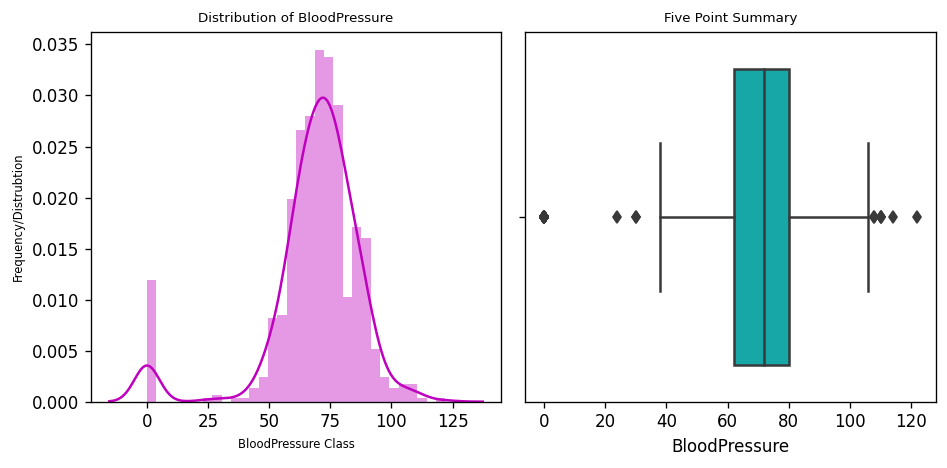

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='m')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BloodPressure',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df.BloodPressure = df.BloodPressure.replace(0,df.BloodPressure.median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.000,72,35,0,33.600,0.627,50,1
1,1,85.000,66,29,0,26.600,0.351,31,0
2,8,183.000,64,0,0,23.300,0.672,32,1
3,1,89.000,66,23,94,28.100,0.167,21,0
4,0,137.000,40,35,168,43.100,2.288,33,1


In [ ]:
df  = std_based('BloodPressure',df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


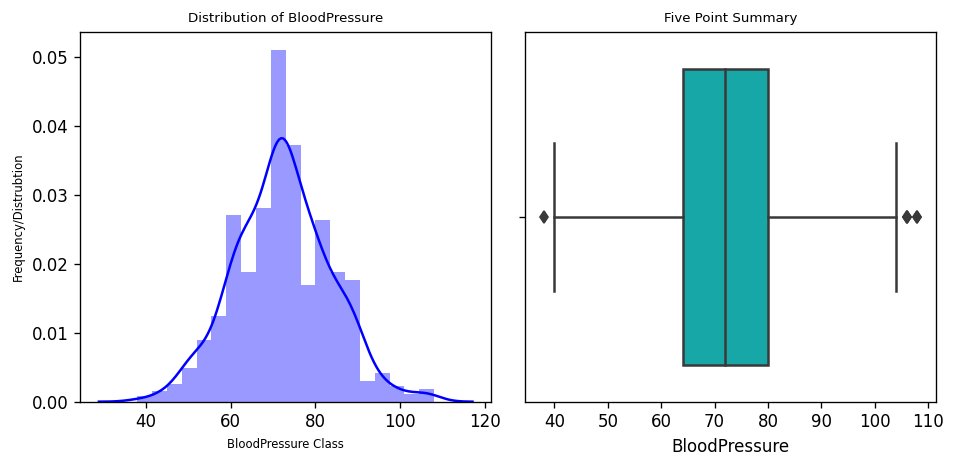

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BloodPressure'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BloodPressure',fontdict={'fontsize':8})
axes[0].set_xlabel('BloodPressure Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BloodPressure',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df.SkinThickness.describe()

count   760.000
mean     20.489
std      15.938
min       0.000
25%       0.000
50%      23.000
75%      32.000
max      99.000
Name: SkinThickness, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


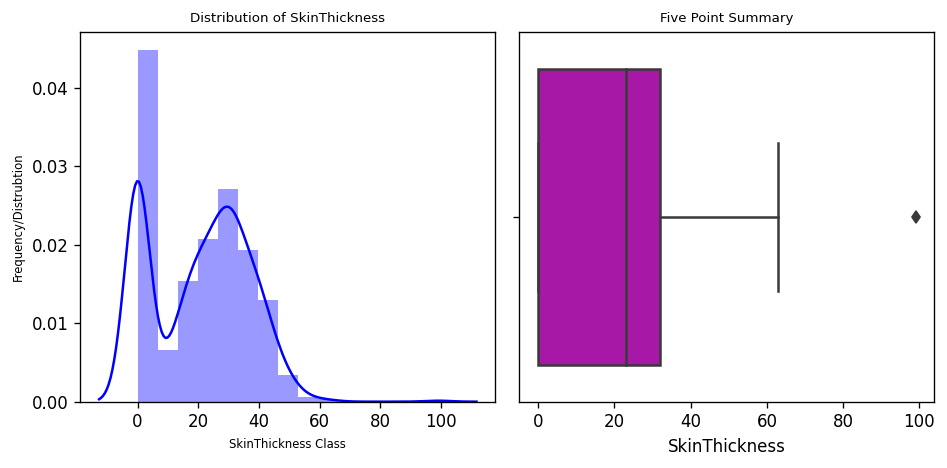

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='b')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df.SkinThickness = df.SkinThickness.replace(0,df.SkinThickness.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.000,72,35.000,0,33.600,0.627,50,1
1,1,85.000,66,29.000,0,26.600,0.351,31,0
2,8,183.000,64,20.489,0,23.300,0.672,32,1
3,1,89.000,66,23.000,94,28.100,0.167,21,0
4,0,137.000,40,35.000,168,43.100,2.288,33,1


In [ ]:
df = std_based("SkinThickness",df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


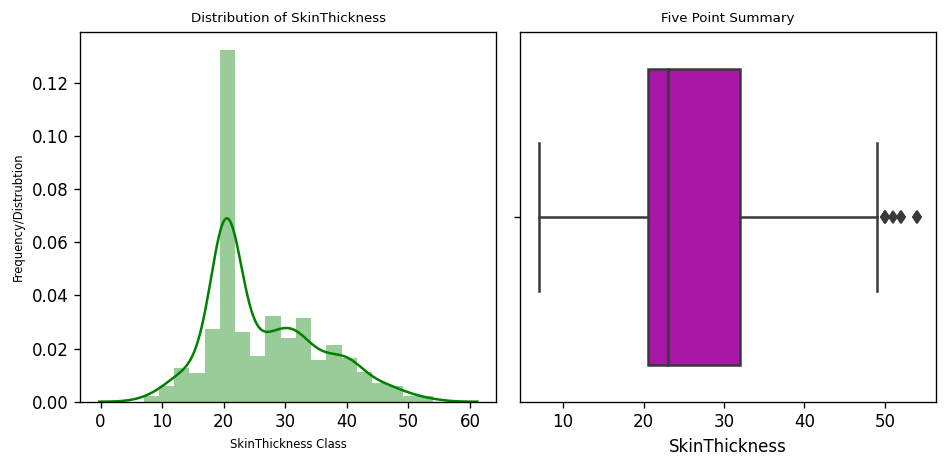

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['SkinThickness'],ax=axes[0],color='green')
axes[0].set_title('Distribution of SkinThickness',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('SkinThickness',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df.Insulin.describe()

count   756.000
mean     80.007
std     115.798
min       0.000
25%       0.000
50%      30.500
75%     128.250
max     846.000
Name: Insulin, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


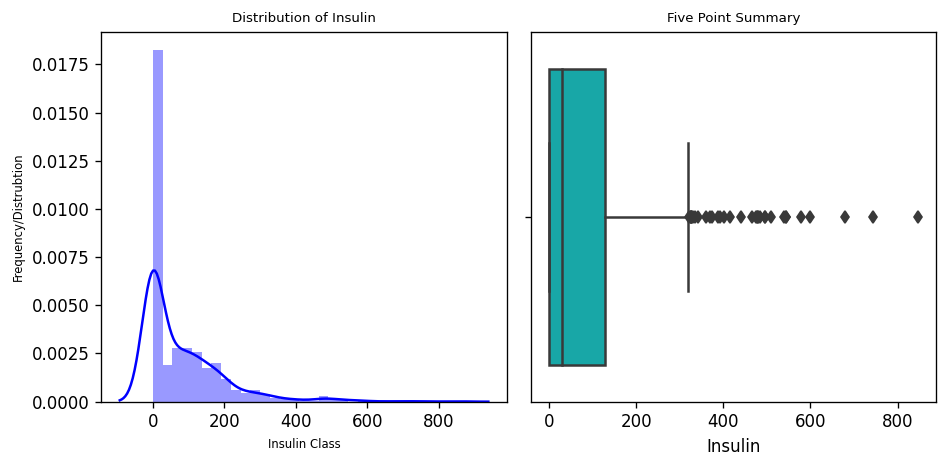

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df.Insulin = df.Insulin.replace(0,df.Insulin.median())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.000,72,35.000,30.500,33.600,0.627,50,1
1,1,85.000,66,29.000,30.500,26.600,0.351,31,0
2,8,183.000,64,20.489,30.500,23.300,0.672,32,1
3,1,89.000,66,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40,35.000,168.000,43.100,2.288,33,1


In [ ]:
df = std_based('Insulin',df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


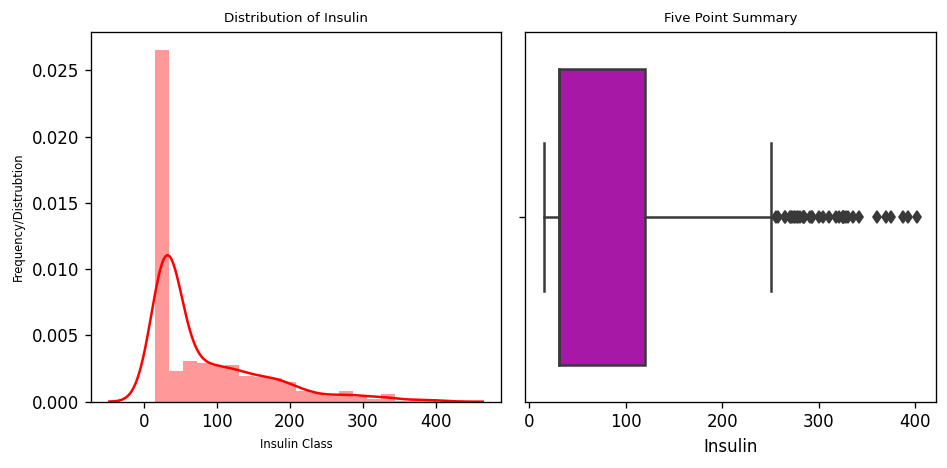

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Insulin'],ax=axes[0],color='r')
axes[0].set_title('Distribution of Insulin',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Insulin',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()


In [ ]:
df.BMI.describe()

count   737.000
mean     31.690
std       7.622
min       0.000
25%      27.100
50%      32.000
75%      36.200
max      57.300
Name: BMI, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


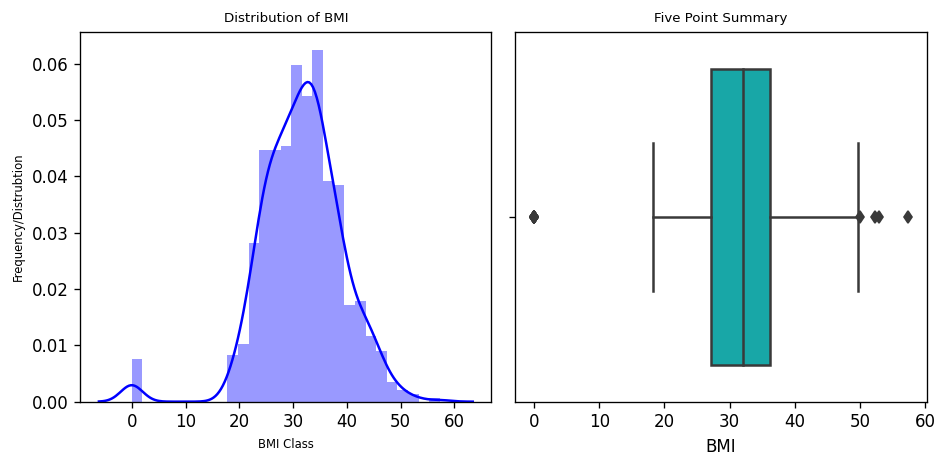

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['BMI'],ax=axes[0],color='b')
axes[0].set_title('Distribution of BMI',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('BMI',data=df,ax=axes[1],orient = 'v',color='c')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()


In [ ]:
df.BMI = df.BMI.replace(0,df.BMI.mean())
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.000,72,35.000,30.500,33.600,0.627,50,1
1,1,85.000,66,29.000,30.500,26.600,0.351,31,0
2,8,183.000,64,20.489,30.500,23.300,0.672,32,1
3,1,89.000,66,23.000,94.000,28.100,0.167,21,0
4,0,137.000,40,35.000,168.000,43.100,2.288,33,1


In [ ]:
df.DPF.describe()

count   737.000
mean      0.464
std       0.314
min       0.078
25%       0.243
50%       0.366
75%       0.613
max       2.288
Name: DPF, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


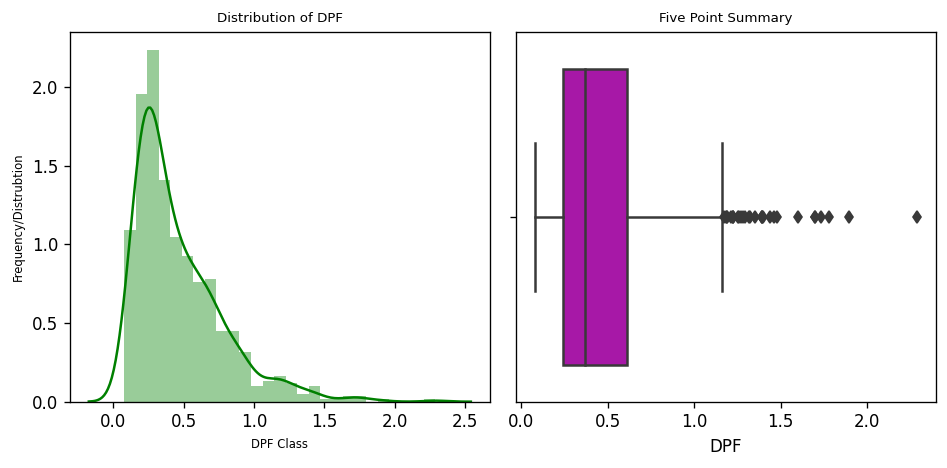

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DPF'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DPF',data=df,ax=axes[1],orient = 'v',color='m')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


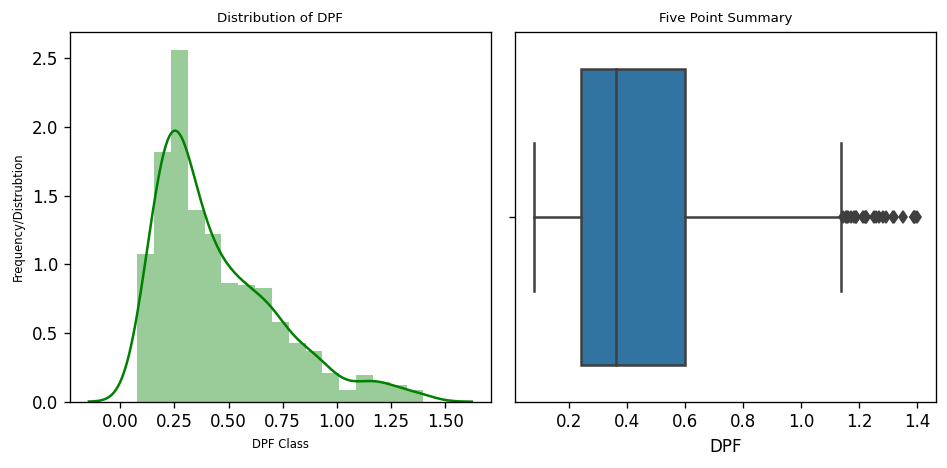

In [ ]:
df = std_based('DPF',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['DPF'],ax=axes[0],color='green')
axes[0].set_title('Distribution of DPF',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('DPF',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df.Age.describe()

count   727.000
mean     33.186
std      11.707
min      21.000
25%      24.000
50%      29.000
75%      40.000
max      81.000
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


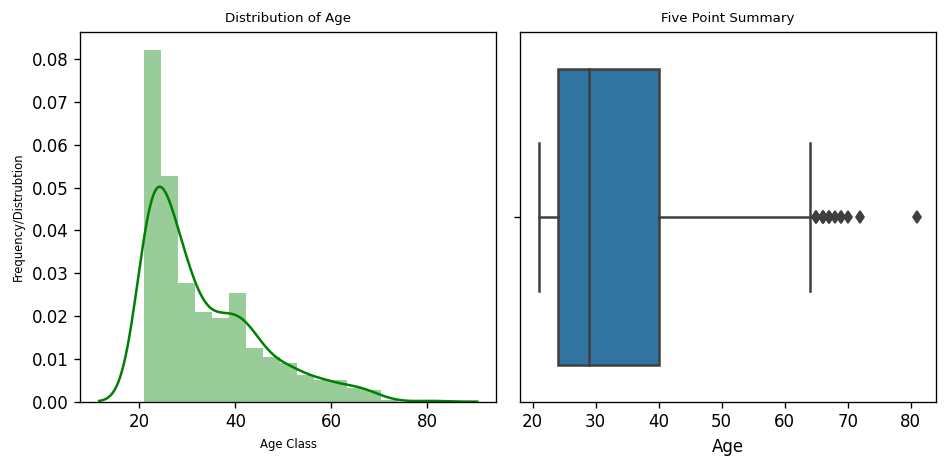

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


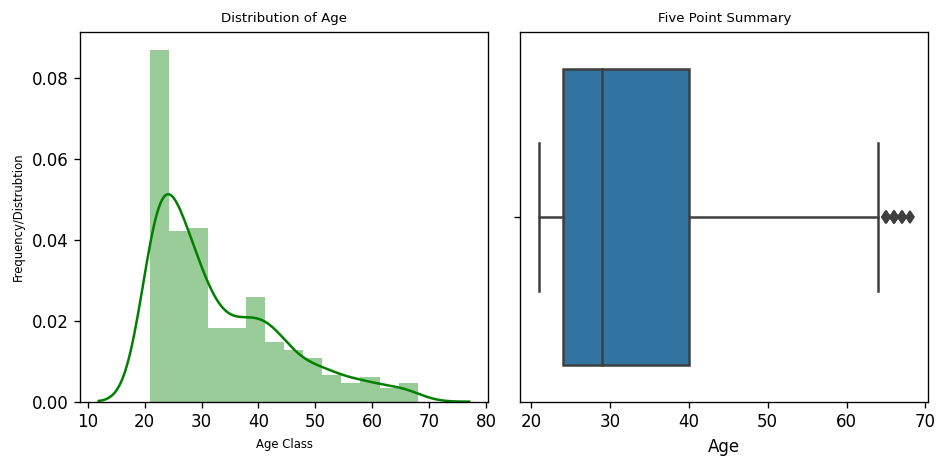

In [ ]:
df = std_based('Age',df)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot00=sns.distplot(df['Age'],ax=axes[0],color='green')
axes[0].set_title('Distribution of Age',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Frequency/Distrubtion',fontdict={'fontsize':7})
plt.tight_layout()


plot01=sns.boxplot('Age',data=df,ax=axes[1],orient = 'v')
axes[1].set_title('Five Point Summary',fontdict={'fontsize':8})
plt.tight_layout()

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.000,72,35.000,30.500,33.600,0.627,50,1
1,1,85.000,66,29.000,30.500,26.600,0.351,31,0
2,8,183.000,64,20.489,30.500,23.300,0.672,32,1
3,1,89.000,66,23.000,94.000,28.100,0.167,21,0
5,5,116.000,74,20.489,30.500,25.600,0.201,30,0


In [ ]:
df.shape

(722, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 722 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    722 non-null    int64  
 1   Glucose        722 non-null    float64
 2   BloodPressure  722 non-null    int64  
 3   SkinThickness  722 non-null    float64
 4   Insulin        722 non-null    float64
 5   BMI            722 non-null    float64
 6   DPF            722 non-null    float64
 7   Age            722 non-null    int64  
 8   Outcome        722 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 56.4 KB


# **Statistical Assumption**



In [ ]:
df.var()

Pregnancies       11.346
Glucose          876.666
BloodPressure    128.300
SkinThickness     80.518
Insulin         5983.524
BMI               42.660
DPF                0.077
Age              127.223
Outcome            0.225
dtype: float64

In [ ]:
df.drop('DPF',axis = 1,inplace=True)

# **Splitting Data**

In [ ]:
df.Outcome.value_counts()

0    476
1    246
Name: Outcome, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


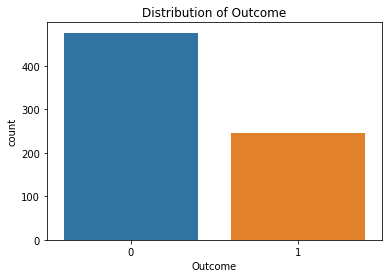

In [ ]:
sns.countplot(df['Outcome']).set_title('Distribution of Outcome')
plt.show()

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(577, 7)
(145, 7)
(577,)
(145,)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

knn = KNeighborsClassifier()

param_grid = {'n_neighbors':[5,10,15,25,30,50]}

grid_knn = GridSearchCV(knn,param_grid,scoring='accuracy',cv = 10,refit = True)

In [ ]:
grid_knn.fit(x_train_std,y_train)
print("Best Score ==> ", grid_knn.best_score_)
print("Tuned Paramerers ==> ",grid_knn.best_params_)
print("Accuracy on Train set ==> ", grid_knn.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_knn.score(x_test_std,y_test))

Best Score ==>  0.7639443436176647
Tuned Paramerers ==>  {'n_neighbors': 25}
Accuracy on Train set ==>  0.7885615251299827
Accuracy on Test set ==>  0.7655172413793103


# **Decision Tree Clasifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_leaf':[0.2,0.4,0.6,0.8,0.9,1]}

grid_dtc = GridSearchCV(dtc,param_grid,scoring='accuracy',cv = 10,refit = True)

In [ ]:
grid_dtc.fit(x_train_std,y_train)
print("Best Score ==> ", grid_dtc.best_score_)
print("Tuned Paramerers ==> ",grid_dtc.best_params_)
print("Accuracy on Train set ==> ", grid_dtc.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_dtc.score(x_test_std,y_test))

Best Score ==>  0.7435269207501513
Tuned Paramerers ==>  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1}
Accuracy on Train set ==>  0.8752166377816292
Accuracy on Test set ==>  0.7310344827586207


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 244, in fit
    % self.min_samples_leaf
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.6

-

# **SVC**

In [ ]:
from sklearn.svm import SVC

svc = SVC(probability=True)

param_grid = {'kernel':['rbf','linear'],'C':[0.01,0.1,1,0.001],'gamma':[0.1,0.01,0.2,0.4]}

grid_svc = GridSearchCV(svc,param_grid,scoring='accuracy',cv = 10,refit = True)

In [ ]:
grid_svc.fit(x_train_std,y_train)
print("Best Score ==> ", grid_svc.best_score_)
print("Tuned Paramerers ==> ",grid_svc.best_params_)
print("Accuracy on Train set ==> ", grid_svc.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_svc.score(x_test_std,y_test))

Best Score ==>  0.772746521476104
Tuned Paramerers ==>  {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy on Train set ==>  0.7816291161178509
Accuracy on Test set ==>  0.7517241379310344


# **Voting Classifier**

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [('knn',grid_knn),('tree',grid_dtc),('svc',grid_svc)]

vtc = VotingClassifier(classifiers)

In [ ]:
vtc.fit(x_train_std,y_train)
print("Accuracy on Test set ==> ", vtc.score(x_test_std,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 244, in fit
    % self.min_samples_leaf
ValueError: min_samples_leaf must be at least 1 or in (0, 0.5], got 0.6

-

Accuracy on Test set ==>  0.7586206896551724


# **Feature Selection**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

for i in range(2,7):
    rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=i, verbose=0)
    rfe.fit(x_train_std,y_train)
    print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(y_test, rfe.predict(x_test_std)))

Accuracy with Feature 2 ==> 0.7034482758620689
Accuracy with Feature 3 ==> 0.7655172413793103
Accuracy with Feature 4 ==> 0.7586206896551724
Accuracy with Feature 5 ==> 0.7655172413793103
Accuracy with Feature 6 ==> 0.7379310344827587


In [ ]:
rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=5, verbose=0)
rfe.fit(x_train_std,y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=5)

In [ ]:
print("Important Features are ==> ",list(df.columns[:7][rfe.support_]))

Important Features are ==>  ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age']


In [ ]:
x=df.loc[:,list(df.columns[:7][rfe.support_])].values
y=df.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train_std = ss.fit_transform(x_train)
x_test_std = ss.transform(x_test)

(577, 5)
(145, 5)
(577,)
(145,)


# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

param_grid = {'n_estimators':[200,500,1000],
              'max_depth':[2,3,4,5],
              'min_samples_leaf':[0.2,0.4,0.6,0.8,1],
              'max_features':['auto','sqrt'],
              'criterion':['gini','entropy']}

grid_rfc = RandomizedSearchCV(rfc,param_grid,n_iter=20,scoring='accuracy',cv = 10,refit = True)

In [ ]:
grid_rfc.fit(x_train_std,y_train)
print("Best Score ==> ", grid_rfc.best_score_)
print("Tuned Paramerers ==> ",grid_rfc.best_params_)
print("Accuracy on Train set ==> ", grid_rfc.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_rfc.score(x_test_std,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

Best Score ==>  0.7745009074410163
Tuned Paramerers ==>  {'n_estimators': 500, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 2, 'criterion': 'gini'}
Accuracy on Train set ==>  0.7902946273830156
Accuracy on Test set ==>  0.7379310344827587


# **XGBoost Classifier**

In [ ]:
import xgboost as xgb

xgbcl = xgb.XGBClassifier()

param_grid = {'booster':['gbtree','gblinear'],
             'colsample_bytree':[0.4,0.6,0.8,1],
             'learning_rate':[0.01,0.1,0.2,0.4],
             'max_depth':[2,3,4,6],
             'n_estimators':[200,300,400,500],
              'subsample':[0.4,0.6,0.8,1]}

grid_xgb = RandomizedSearchCV(xgbcl,param_grid,n_iter=30,scoring='accuracy',cv = 10,refit = True)

In [ ]:
grid_xgb.fit(x_train_std,y_train)
print("Best Score ==> ", grid_xgb.best_score_)
print("Tuned Paramerers ==> ",grid_xgb.best_params_)
print("Accuracy on Train set ==> ", grid_xgb.score(x_train_std,y_train))
print("Accuracy on Test set ==> ", grid_xgb.score(x_test_std,y_test))

Best Score ==>  0.7692679975801572
Tuned Paramerers ==>  {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 2, 'learning_rate': 0.01, 'colsample_bytree': 0.4, 'booster': 'gbtree'}
Accuracy on Train set ==>  0.8006932409012132
Accuracy on Test set ==>  0.7517241379310344


# **ANN**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
classifier.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(x_train_std, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
58/58 [==============================] - 2s 6ms/step - loss: 0.6889 - accuracy: 0.6707
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.6707
Epoch 3/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.6707
Epoch 4/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.6794
Epoch 5/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5118 - accuracy: 0.7522
Epoch 6/100
58/58 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7782
Epoch 7/100
58/58 [==============================] - 0s 2ms/step - loss: 0.4939 - accuracy: 0.7834
Epoch 8/100
58/58 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.7782
Epoch 9/100
58/58 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7782
Epoch 10/100
58/58 [==============================] - 0s 2ms/step - loss: 0.4788 - accuracy: 0.7747
Epoch 11/

In [ ]:
y_pred_test = classifier.predict(x_test_std)
y_pred_test=y_pred_test>0.5

y_pred_train = classifier.predict(x_train_std)
y_pred_train=y_pred_train>0.5

print("Accuracy on Train Set ==> ",metrics.accuracy_score(y_train,y_pred_train))
print("Accuracy on Test Set ==> ",metrics.accuracy_score(y_test,y_pred_test))

Accuracy on Train Set ==>  0.7729636048526863
Accuracy on Test Set ==>  0.7862068965517242
